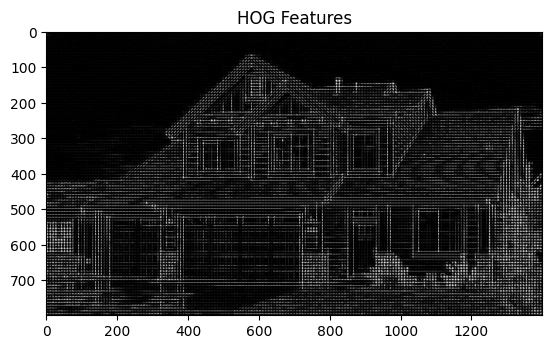

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# 이미지 로드 및 전처리
image = cv2.imread('image.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# HOG 특징 추출
fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

# 결과 시각화
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Features')
plt.show()

In [5]:
import cv2
import matplotlib.pyplot as plt

# 비디오 파일 로드
video_path = 'vtest.avi'
cap = cv2.VideoCapture(video_path)

# HOG 객체 검출기 초기화
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 보행자 검출
    (rects, weights) = hog.detectMultiScale(gray, winStride=(8, 8), padding=(8, 8), scale=1.05)

    # 검출 결과를 이미지에 그리기
    for (x, y, w, h) in rects:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # 결과 시각화
    cv2.imshow('HOG Detection', frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()